* Topic:        Challenge Set 1
* Subject:      Explore MTA turnstile data
* Date:         09/26/2020
* Name:         Michael Green ( malexgreen@gmail.com )
* Worked with:  Julian Cheng, Lucy Abbot, Solomon Klein

In [1]:
import pandas as pd
import numpy as np

#importing this as I will need
#to generate date datatypes
import datetime


Some notes about pandas functions

`pandas.DataFrame.sort_values(by=[col1,col2,..,colN])`will sort the data frame along the columns (col1, col2,...,colN) given. 

See [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values) for more details

`pandas.DataFrame.drop_duplicates(subset=[col1,col2,...,colN])` will remove all rows with duplicate values in col1, col2,...,colN. 

See [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html?highlight=drop_duplicates#pandas.DataFrame.drop_duplicates) for more details.


# Challenge 1

In [2]:
#Importing CSV MTA File

raw_csv_read_df_list = []

#using agreed upon set of CSV files in this google doc
#https://docs.google.com/document/d/1cjXIWAZjWP8KMultOzcyQ4vc6-9tzu3A9N6552qh1cU/edit

#got these files from here: http://web.mta.info/developers/turnstile.html
list_of_csv_URLs = ["http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt", 
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190914.txt", 
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190907.txt", 
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190831.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190824.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190817.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190810.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190803.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190727.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190727.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190713.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190706.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191228.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191221.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191214.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191207.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191130.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191123.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191116.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191109.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191102.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191026.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191019.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191012.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_191005.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190928.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190427.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190420.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190413.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190406.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190330.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190323.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190316.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190309.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190302.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190223.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190216.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190209.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190202.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190126.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190119.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190112.txt",
                    "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190105.txt"

                   ]
print("Going to load {} TXT Files into separate dfs".format(len(list_of_csv_URLs)))

Going to load 53 TXT Files into separate dfs


In [3]:
#TODO: Use a list comprehension because it's faster

raw_csv_read_df_list = [pd.read_csv(csv_file) for csv_file in list_of_csv_URLs]



In [4]:
concat_df = pd.concat(raw_csv_read_df_list)

Examining the contents to better understand the data set

In [5]:
concat_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483


In [6]:
concat_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

The name of the exits column has extra spaces at the end. So will strip those out

In [7]:
concat_df.columns = [column.strip() for column in concat_df.columns]

In [8]:
concat_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
print("shape of dataframe is {}".format(concat_df.shape))

shape of dataframe is (10874353, 11)


In [10]:
concat_df["SCP"].value_counts()

00-00-00    1030380
00-00-01    1021840
00-00-02     910976
00-00-03     458030
00-03-00     382106
             ...   
00-52-00          1
02-05-05          1
00-10-00          1
00-D6-01          1
00-F6-01          1
Name: SCP, Length: 234, dtype: int64

Getting a feel for the data:

In [11]:
concat_df.describe()

,ENTRIES,EXITS
count,1.087435e+07,1.087435e+07
mean,4.154313e+07,3.414393e+07
std,2.127486e+08,1.962123e+08
min,0.000000e+00,0.000000e+00
25%,3.348110e+05,1.409970e+05
50%,2.153460e+06,1.244772e+06
75%,6.734404e+06,4.611480e+06
max,2.129552e+09,2.124342e+09


# Challenge 2

* Let's turn this into a time series.
* Our pandas dataframe has columns called `Date` and `Time` (what datatype did pandas assign to these columns on import?), however in python and pandas we can convert date and time information to datetime objects, which allow us to do time-based operations
* Using either [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) in pandas or the [python datetime library](https://docs.python.org/2/library/datetime.html), combine the Date and Time columns into a single new column of the datetime datatype

In [12]:
type(concat_df.iloc[0,6])

str

In [13]:
concat_df["DATE_TIME"] = pd.to_datetime(concat_df["DATE"]+" "+concat_df["TIME"])

#also just want a column that just has the date but as a Timestamp object
concat_df["DATETIME_DATE"] = concat_df.apply(lambda row: row["DATE_TIME"].date(), axis=1)

In [14]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10874353 entries, 0 to 201602
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   C/A            object        
 1   UNIT           object        
 2   SCP            object        
 3   STATION        object        
 4   LINENAME       object        
 5   DIVISION       object        
 6   DATE           object        
 7   TIME           object        
 8   DESC           object        
 9   ENTRIES        int64         
 10  EXITS          int64         
 11  DATE_TIME      datetime64[ns]
 12  DATETIME_DATE  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 1.1+ GB


In [15]:
concat_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATETIME_DATE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323,2019-09-14 00:00:00,2019-09-14
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325,2019-09-14 04:00:00,2019-09-14
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354,2019-09-14 08:00:00,2019-09-14
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428,2019-09-14 12:00:00,2019-09-14
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483,2019-09-14 16:00:00,2019-09-14


In [16]:
#is DATE_TIME a datetime type?
type(concat_df.iloc[0,11])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
#is DATETIME_DATE a time object?
type(concat_df.iloc[0,12])

datetime.date

## Doing some more examination of the data

Checking to see if the `ENTRIES` count is unqique for each `("C/A", "UNIT", "SCP", "STATION", "DATE_TIME")` tuple.


In [18]:
(concat_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
7412660,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,4
8456938,R256,R182,00-00-03,116 ST,2019-07-24 21:00:00,4
7414813,R174,R034,00-00-03,125 ST,2019-06-08 00:00:00,4
2484499,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,4
7410508,R174,R034,00-00-01,125 ST,2019-06-08 00:00:00,4


So it looks like some of these tuples have the same `ENTRIES` values. Taking a look at a few examples:

In [19]:
mask = (concat_df["C/A"]=="R256") &\
    (concat_df["UNIT"]=="R182") &\
    (concat_df["SCP"]=="00-00-03") &\
    (concat_df["STATION"]=="116 ST") &\
    (concat_df["DATE_TIME"].dt.date == datetime.datetime(2019,7,24).date())

#get the rows in the data frame according to the mask
concat_df[mask].head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATETIME_DATE
167326,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,01:00:00,REGULAR,304288,251923,2019-07-24 01:00:00,2019-07-24
167327,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,05:00:00,REGULAR,304307,251945,2019-07-24 05:00:00,2019-07-24
167328,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,09:00:00,REGULAR,304901,252245,2019-07-24 09:00:00,2019-07-24
167329,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,13:00:00,REGULAR,305391,252559,2019-07-24 13:00:00,2019-07-24
167330,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,17:00:00,REGULAR,305859,252912,2019-07-24 17:00:00,2019-07-24
167331,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,REGULAR,306182,253250,2019-07-24 21:00:00,2019-07-24
167332,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,RECOVR AUD,0,82,2019-07-24 21:00:00,2019-07-24
167326,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,01:00:00,REGULAR,304288,251923,2019-07-24 01:00:00,2019-07-24
167327,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,05:00:00,REGULAR,304307,251945,2019-07-24 05:00:00,2019-07-24
167328,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,09:00:00,REGULAR,304901,252245,2019-07-24 09:00:00,2019-07-24


There are 4 rows that have the same `("C/A","UNIT","STATION","DATE_TIME")` tuple (rows 167331 and 167332)




In [20]:
concat_df.DESC.value_counts()

REGULAR       10826341
RECOVR AUD       48012
Name: DESC, dtype: int64

In [21]:
concat_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
concat_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [22]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(concat_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29 03:00:00,1
6975091,R139,R031,04-00-00,34 ST-PENN STA,2019-07-10 00:00:00,1
6975084,R139,R031,04-00-00,34 ST-PENN STA,2019-07-08 20:00:00,1
6975085,R139,R031,04-00-00,34 ST-PENN STA,2019-07-09 00:00:00,1
6975086,R139,R031,04-00-00,34 ST-PENN STA,2019-07-09 04:00:00,1


Looks like every row has a unique `ENTRIES` count now

In [23]:
#Dropping the EXITS and DESC columns same as in the lecture
concat_df = concat_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [24]:
concat_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'DATE_TIME', 'DATETIME_DATE'],
      dtype='object')

In [25]:
#get the rows in the data frame according to the mask
mask = (concat_df["C/A"]=="R256") &\
    (concat_df["UNIT"]=="R182") &\
    (concat_df["SCP"]=="00-00-03") &\
    (concat_df["STATION"]=="116 ST") &\
    (concat_df["DATE_TIME"].dt.date == datetime.datetime(2019,7,24).date())
concat_df[mask].head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DATETIME_DATE
167331,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,306182,2019-07-24 21:00:00,2019-07-24
167330,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,17:00:00,305859,2019-07-24 17:00:00,2019-07-24
167329,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,13:00:00,305391,2019-07-24 13:00:00,2019-07-24
167328,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,09:00:00,304901,2019-07-24 09:00:00,2019-07-24
167327,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,05:00:00,304307,2019-07-24 05:00:00,2019-07-24
167326,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,01:00:00,304288,2019-07-24 01:00:00,2019-07-24


In [26]:
#get the rows in the data frame according to the mask
mask = (concat_df["C/A"]=="R256") &\
    (concat_df["UNIT"]=="R182") &\
    (concat_df["SCP"]=="00-00-03") &\
    (concat_df["STATION"]=="116 ST") &\
    (concat_df["DATE_TIME"].dt.date == datetime.datetime(2019,7,25).date())
concat_df[mask].head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DATETIME_DATE
167340,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,21:00:00,308174,2019-07-25 21:00:00,2019-07-25
167339,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,17:00:00,307851,2019-07-25 17:00:00,2019-07-25
167338,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,13:00:00,307388,2019-07-25 13:00:00,2019-07-25
167337,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,09:00:00,306885,2019-07-25 09:00:00,2019-07-25
167336,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,07:00:00,0,2019-07-25 07:00:00,2019-07-25
167335,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,05:00:00,306324,2019-07-25 05:00:00,2019-07-25
167334,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,02:00:00,0,2019-07-25 02:00:00,2019-07-25
167333,R256,R182,00-00-03,116 ST,6,IRT,07/25/2019,01:00:00,306300,2019-07-25 01:00:00,2019-07-25


# Challenge 3

* Each row is a turnstile, identified by a combination of the `C/A`, `UNIT`, `SCP`, and `STATION` columns, with information on entries and exits at that turnstile every n hours. (What is n?) We want total daily entries.
* Group the data so that it represents daily entries for each turnstile (hint:`pd.groupby` or `DataFrame.groupby`)

Answer to "what is n?": n = 4 hours

In [27]:
#Sorting the data frame by DATETIME_DATE in ascending order
concat_df.sort_values("DATETIME_DATE",inplace=True)

In [28]:
concat_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DATETIME_DATE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,6889287,2018-12-29 03:00:00,2018-12-29
32634,H022,R279,00-06-01,JEFFERSON ST,L,BMT,12/29/2018,11:00:00,8724325,2018-12-29 11:00:00,2018-12-29
32635,H022,R279,00-06-01,JEFFERSON ST,L,BMT,12/29/2018,15:00:00,8724709,2018-12-29 15:00:00,2018-12-29
32636,H022,R279,00-06-01,JEFFERSON ST,L,BMT,12/29/2018,19:00:00,8725141,2018-12-29 19:00:00,2018-12-29
32637,H022,R279,00-06-01,JEFFERSON ST,L,BMT,12/29/2018,23:00:00,8725385,2018-12-29 23:00:00,2018-12-29


A turnstile can be uniquely identified by the tuple of `("C/A","UNIT","SCP","STATION")`

I will pick the first `ENTRIES` count as being the entry count for that day

In [29]:
concat_df_daily_entries = (concat_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME_DATE"],as_index=False)
                        .ENTRIES.first())

In [30]:
concat_df_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATETIME_DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29,6889287
1,A002,R051,02-00-00,59 ST,2018-12-30,6890279
2,A002,R051,02-00-00,59 ST,2018-12-31,6891946
3,A002,R051,02-00-00,59 ST,2019-01-01,6892430
4,A002,R051,02-00-00,59 ST,2019-01-02,6892814


I'm going to rename the column `ENTRIES` in the data frame `concat_df_daily_entries` to `DAILY_ENTRIES` so that it won't be confused with `ENTRIES` that still exists in data frame `concat_df`

In [31]:
mask = (concat_df["C/A"]=="A002") &\
    (concat_df["UNIT"]=="R051") &\
    (concat_df["SCP"]=="02-00-00") &\
    (concat_df["STATION"]=="59 ST") &\
    (concat_df["DATE_TIME"].dt.date == datetime.datetime(2019,6,8).date())
concat_df[mask].sort_values("DATE_TIME").head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DATETIME_DATE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,7089463,2019-06-08 00:00:00,2019-06-08
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,04:00:00,7089491,2019-06-08 04:00:00,2019-06-08
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,08:00:00,7089511,2019-06-08 08:00:00,2019-06-08
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,12:00:00,7089598,2019-06-08 12:00:00,2019-06-08
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,16:00:00,7089801,2019-06-08 16:00:00,2019-06-08
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,20:00:00,7090115,2019-06-08 20:00:00,2019-06-08


In [32]:
concat_df_daily_entries.rename(columns={"ENTRIES":"DAILY_ENTRIES"}, inplace=True)

In [33]:
concat_df_daily_entries.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME_DATE', 'DAILY_ENTRIES'], dtype='object')

In [34]:
concat_df_daily_entries.head(10)

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29,6889287
1,A002,R051,02-00-00,59 ST,2018-12-30,6890279
2,A002,R051,02-00-00,59 ST,2018-12-31,6891946
3,A002,R051,02-00-00,59 ST,2019-01-01,6892430
4,A002,R051,02-00-00,59 ST,2019-01-02,6892814
5,A002,R051,02-00-00,59 ST,2019-01-03,6895434
6,A002,R051,02-00-00,59 ST,2019-01-04,6895462
7,A002,R051,02-00-00,59 ST,2019-01-05,6897740
8,A002,R051,02-00-00,59 ST,2019-01-06,6898382
9,A002,R051,02-00-00,59 ST,2019-01-07,6898763


Adding two new columns:
* `PREV_DATETIME_DATE`: The datetime date of the immediately previous day of the current row
* `PREV_DAILY_ENTRIES`: The `ENTRIES` values for that immediately previous datetime day


In [35]:
concat_df_daily_entries[["PREV_DATETIME_DATE", "PREV_DAILY_ENTRIES"]] = (concat_df_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME_DATE", "DAILY_ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-35-ba449c8b501f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  concat_df_daily_entries[["PREV_DATETIME_DATE", "PREV_DAILY_ENTRIES"]] = (concat_df_daily_entries


In [36]:
concat_df_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES,PREV_DATETIME_DATE,PREV_DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29,6889287,NaN,NaN
1,A002,R051,02-00-00,59 ST,2018-12-30,6890279,2018-12-29,6889287.0
2,A002,R051,02-00-00,59 ST,2018-12-31,6891946,2018-12-30,6890279.0
3,A002,R051,02-00-00,59 ST,2019-01-01,6892430,2018-12-31,6891946.0
4,A002,R051,02-00-00,59 ST,2019-01-02,6892814,2019-01-01,6892430.0


In [37]:
concat_df_daily_entries.tail()

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES,PREV_DATETIME_DATE,PREV_DAILY_ENTRIES
1734030,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-23,5554,2019-12-22,5554.0
1734031,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-24,5554,2019-12-23,5554.0
1734032,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-25,5554,2019-12-24,5554.0
1734033,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-26,5554,2019-12-25,5554.0
1734034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-12-27,5554,2019-12-26,5554.0


Drop rows that are NaN for `PREV_DATETIME_DATE`
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [38]:
concat_df_daily_entries.dropna(subset=["PREV_DATETIME_DATE"], axis=0, inplace=True)

Searching for entries in `concat_df_daily_entries` where `DAILY_ENTRIES` < `PREV_DAILY_ENTRIES`

In [39]:
mask = concat_df_daily_entries["DAILY_ENTRIES"] < concat_df_daily_entries["PREV_DAILY_ENTRIES"]
concat_df_daily_entries[mask].head(10)

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES,PREV_DATETIME_DATE,PREV_DAILY_ENTRIES
3556,A002,R051,02-05-00,59 ST,2019-12-18,12,2019-12-17,2.120000e+02
4119,A002,R051,02-06-00,59 ST,2019-07-20,7615,2019-07-12,2.582490e+05
4257,A002,R051,02-06-00,59 ST,2019-12-05,1091,2019-12-04,1.307240e+05
6427,A006,R079,00-03-01,5 AV/59 ST,2019-01-03,364,2019-01-02,2.452000e+04
6440,A006,R079,00-03-01,5 AV/59 ST,2019-01-16,4325,2019-01-15,1.536000e+04
7701,A007,R079,01-05-01,5 AV/59 ST,2019-08-05,0,2019-08-04,1.000000e+00
12101,A011,R080,01-00-00,57 ST-7 AV,2018-12-30,46,2018-12-29,8.858351e+08
12458,A011,R080,01-00-01,57 ST-7 AV,2018-12-30,197,2018-12-29,1.681555e+07
12816,A011,R080,01-00-02,57 ST-7 AV,2018-12-31,535,2018-12-30,1.562636e+09
13173,A011,R080,01-00-03,57 ST-7 AV,2018-12-31,782,2018-12-30,1.663107e+09


Let's pick a turnstile and a date where we see DAILY_ENTRIES < PREV_DAILY_ENTRIES and examine the entry counts on every 4 hour increment


In [40]:
mask = (concat_df["C/A"] == "A011") &\
        (concat_df["UNIT"] == "R080") &\
        (concat_df["SCP"] == "01-03-00") &\
        (concat_df["STATION"] == "57 ST-7 AV") &\
        (concat_df["DATE_TIME"].dt.date == datetime.datetime(2019,8,20).date())

concat_df[mask].sort_values("DATE_TIME").head(8)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DATETIME_DATE
1633,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/20/2019,00:00:00,885829659,2019-08-20 00:00:00,2019-08-20
1634,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/20/2019,04:00:00,885829659,2019-08-20 04:00:00,2019-08-20
1635,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/20/2019,08:00:00,885829659,2019-08-20 08:00:00,2019-08-20
1636,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/20/2019,12:00:00,885829659,2019-08-20 12:00:00,2019-08-20
1637,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/20/2019,16:00:00,885829605,2019-08-20 16:00:00,2019-08-20
1638,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/20/2019,20:00:00,885829427,2019-08-20 20:00:00,2019-08-20


It's not strange that the counter doesn't count up for 12 hours.

But it is strange that it counts down: it's 885829659 at 12:00:00 and is 885829605 at 16:00.

Possible reasons:
* malfunction
* someone or something forced the number to 88529605 at 16:00
* The counter rolled over or reset to 0 sometime between 12:00 and 16:00. And then 8M+ people passed through after the number reached zero



Let's determine how many rows have this issue where DAILY_ENTRIES < PREV_DAILY_ENTRIES

In [41]:
mask = concat_df_daily_entries["DAILY_ENTRIES"] < concat_df_daily_entries["PREV_DAILY_ENTRIES"]
concat_df_daily_entries[mask].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

C/A    UNIT  SCP       STATION        
A002   R051  02-05-00  59 ST                1
             02-06-00  59 ST                2
A006   R079  00-03-01  5 AV/59 ST           2
A007   R079  01-05-01  5 AV/59 ST           1
A011   R080  01-00-00  57 ST-7 AV           1
                                         ... 
R645   R110  00-03-00  FLATBUSH AV-B.C      3
             00-03-02  FLATBUSH AV-B.C      5
R646   R110  01-00-01  FLATBUSH AV-B.C    349
R730   R431  00-00-04  EASTCHSTER/DYRE    347
TRAM1  R468  00-00-01  RIT-MANHATTAN        1
Length: 936, dtype: int64

Will apply a function to each entry in the data frame.

If DAILY_ENTRIES < PREV_DAILY_ENTRIES, will set DAILY_ENTRIES = -1*(DAILY_ENTRIES - PREV_DAILY_ENTRIES)
If DAILY_ENTRIES - PREV_DAILY_ENTRIES > BIG_NUMBER, will set DAILY_ENTRIES = 0 under the assumption that the counter was reset on that day


In [42]:
def get_daily_counts(row_in_dataframe,BIG_NUMBER):
    count = row_in_dataframe["DAILY_ENTRIES"] - row_in_dataframe["PREV_DAILY_ENTRIES"]
    
    if count < 0:
        count = -1 * count
    if count > BIG_NUMBER:
        #print("row[DAILY_ENTRIES] = {} row[PREV_DAILY_ENTRIES] = {}".format(row_in_dataframe["DAILY_ENTRIES"], row_in_dataframe["PREV_DAILY_ENTRIES"]))
        count = min(row_in_dataframe["DAILY_ENTRIES"], row_in_dataframe["PREV_DAILY_ENTRIES"])
    if count > BIG_NUMBER:
        #print("Set it zero")
        return 0
    
    #if all else fails
    return count

In [43]:
#run it over the dataframe to adjust "DAILY_ENTRIES" values
concat_df_daily_entries["DAILY_ENTRIES"] = concat_df_daily_entries.apply(get_daily_counts,axis=1,BIG_NUMBER=1000000)

Are things still counting backwards?

In [44]:
mask = (concat_df_daily_entries["C/A"] == "A011") &\
        (concat_df_daily_entries["UNIT"] == "R080") &\
        (concat_df_daily_entries["SCP"] == "01-03-00") &\
        (concat_df_daily_entries["STATION"] == "57 ST-7 AV") &\
        (concat_df_daily_entries["DATETIME_DATE"].astype(str) == "2019-08-20")

concat_df_daily_entries[mask].head(5)

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES,PREV_DATETIME_DATE,PREV_DAILY_ENTRIES
13916,A011,R080,01-03-00,57 ST-7 AV,2019-08-20,232.0,2019-08-19,885829659.0


In [45]:
concat_df_daily_entries.head(11)

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES,PREV_DATETIME_DATE,PREV_DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2018-12-30,992.0,2018-12-29,6889287.0
2,A002,R051,02-00-00,59 ST,2018-12-31,1667.0,2018-12-30,6890279.0
3,A002,R051,02-00-00,59 ST,2019-01-01,484.0,2018-12-31,6891946.0
4,A002,R051,02-00-00,59 ST,2019-01-02,384.0,2019-01-01,6892430.0
5,A002,R051,02-00-00,59 ST,2019-01-03,2620.0,2019-01-02,6892814.0
6,A002,R051,02-00-00,59 ST,2019-01-04,28.0,2019-01-03,6895434.0
7,A002,R051,02-00-00,59 ST,2019-01-05,2278.0,2019-01-04,6895462.0
8,A002,R051,02-00-00,59 ST,2019-01-06,642.0,2019-01-05,6897740.0
9,A002,R051,02-00-00,59 ST,2019-01-07,381.0,2019-01-06,6898382.0
10,A002,R051,02-00-00,59 ST,2019-01-08,1524.0,2019-01-07,6898763.0


I think I should rename PREV_DAILY_ENTRIES to PREV_DAILY_ENTRIES_COUNT.


In [46]:
concat_df_daily_entries.rename(columns={"PREV_DAILY_ENTRIES":"PREV_DAILY_ENTRIES_COUNT"},inplace=True)

In [47]:
concat_df_daily_entries.head(11)

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES,PREV_DATETIME_DATE,PREV_DAILY_ENTRIES_COUNT
1,A002,R051,02-00-00,59 ST,2018-12-30,992.0,2018-12-29,6889287.0
2,A002,R051,02-00-00,59 ST,2018-12-31,1667.0,2018-12-30,6890279.0
3,A002,R051,02-00-00,59 ST,2019-01-01,484.0,2018-12-31,6891946.0
4,A002,R051,02-00-00,59 ST,2019-01-02,384.0,2019-01-01,6892430.0
5,A002,R051,02-00-00,59 ST,2019-01-03,2620.0,2019-01-02,6892814.0
6,A002,R051,02-00-00,59 ST,2019-01-04,28.0,2019-01-03,6895434.0
7,A002,R051,02-00-00,59 ST,2019-01-05,2278.0,2019-01-04,6895462.0
8,A002,R051,02-00-00,59 ST,2019-01-06,642.0,2019-01-05,6897740.0
9,A002,R051,02-00-00,59 ST,2019-01-07,381.0,2019-01-06,6898382.0
10,A002,R051,02-00-00,59 ST,2019-01-08,1524.0,2019-01-07,6898763.0


In [48]:
concat_df_daily_entries.shape

(1728991, 8)

# Challenge 4
We will plot the daily time series for a single turnstile.
In ipython notebook, add this to the beginning of your next cell:

```python
    %matplotlib inline
```

This will make your matplotlib graphs integrate nicely with the notebook.

To plot the time series, import matplotlib with

```python
  import matplotlib.pyplot as plt

```

* Select one turnstile (combination of [C/A, UNIT, SCP, STATION])
* Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
* Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis
* You can use the following as a starting point:

```python
 plt.figure(figsize=(10,3))
    plt.plot(<days>,<entries>)
```

In [49]:
%matplotlib inline

In [50]:
import matplotlib.pyplot as plt

In [51]:
concat_df_daily_entries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728991 entries, 1 to 1734034
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   C/A                       object 
 1   UNIT                      object 
 2   SCP                       object 
 3   STATION                   object 
 4   DATETIME_DATE             object 
 5   DAILY_ENTRIES             float64
 6   PREV_DATETIME_DATE        object 
 7   PREV_DAILY_ENTRIES_COUNT  float64
dtypes: float64(2), object(6)
memory usage: 118.7+ MB


Creating a mask so that I can select a single station in the `concat_df_daily_entries` data frame.

In [52]:
mask = (concat_df_daily_entries["C/A"] == "A002") &\
        (concat_df_daily_entries["UNIT"]=="R051") &\
        (concat_df_daily_entries["SCP"]=="02-00-00") &\
        (concat_df_daily_entries["STATION"] == "59 ST") #&\
#        (concat_df_daily_entries["DATETIME_DATE"] >= pd.Timestamp(year=2019,month=8,day=1)) &\
#        (concat_df_daily_entries["DATETIME_DATE"] < pd.Timestamp(year=2019,month=9,day=1))

In [53]:
concat_df_daily_entries[mask].tail(20)

,C/A,UNIT,SCP,STATION,DATETIME_DATE,DAILY_ENTRIES,PREV_DATETIME_DATE,PREV_DAILY_ENTRIES_COUNT
337,A002,R051,02-00-00,59 ST,2019-12-08,1548.0,2019-12-07,7299950.0
338,A002,R051,02-00-00,59 ST,2019-12-09,426.0,2019-12-08,7301498.0
339,A002,R051,02-00-00,59 ST,2019-12-10,2518.0,2019-12-09,7301924.0
340,A002,R051,02-00-00,59 ST,2019-12-11,1476.0,2019-12-10,7304442.0
341,A002,R051,02-00-00,59 ST,2019-12-12,1580.0,2019-12-11,7305918.0
342,A002,R051,02-00-00,59 ST,2019-12-13,486.0,2019-12-12,7307498.0
343,A002,R051,02-00-00,59 ST,2019-12-14,1822.0,2019-12-13,7307984.0
344,A002,R051,02-00-00,59 ST,2019-12-15,53.0,2019-12-14,7309806.0
345,A002,R051,02-00-00,59 ST,2019-12-16,736.0,2019-12-15,7309859.0
346,A002,R051,02-00-00,59 ST,2019-12-17,1500.0,2019-12-16,7310595.0


Creating a series of `DAILY_ENTRIES` counts from a single turnstile using the `mask` defined above. 

Will pick the turnstile that is identified by the tuple `("A002","R051","02-00-00","59 ST")`.

In [54]:



one_turnstile_daily_entries_series = concat_df_daily_entries[mask]["DAILY_ENTRIES"]

In [55]:
one_turnstile_daily_entries_series.head()

1     992.0
2    1667.0
3     484.0
4     384.0
5    2620.0
Name: DAILY_ENTRIES, dtype: float64

In [56]:
type(one_turnstile_daily_entries_series)

pandas.core.series.Series

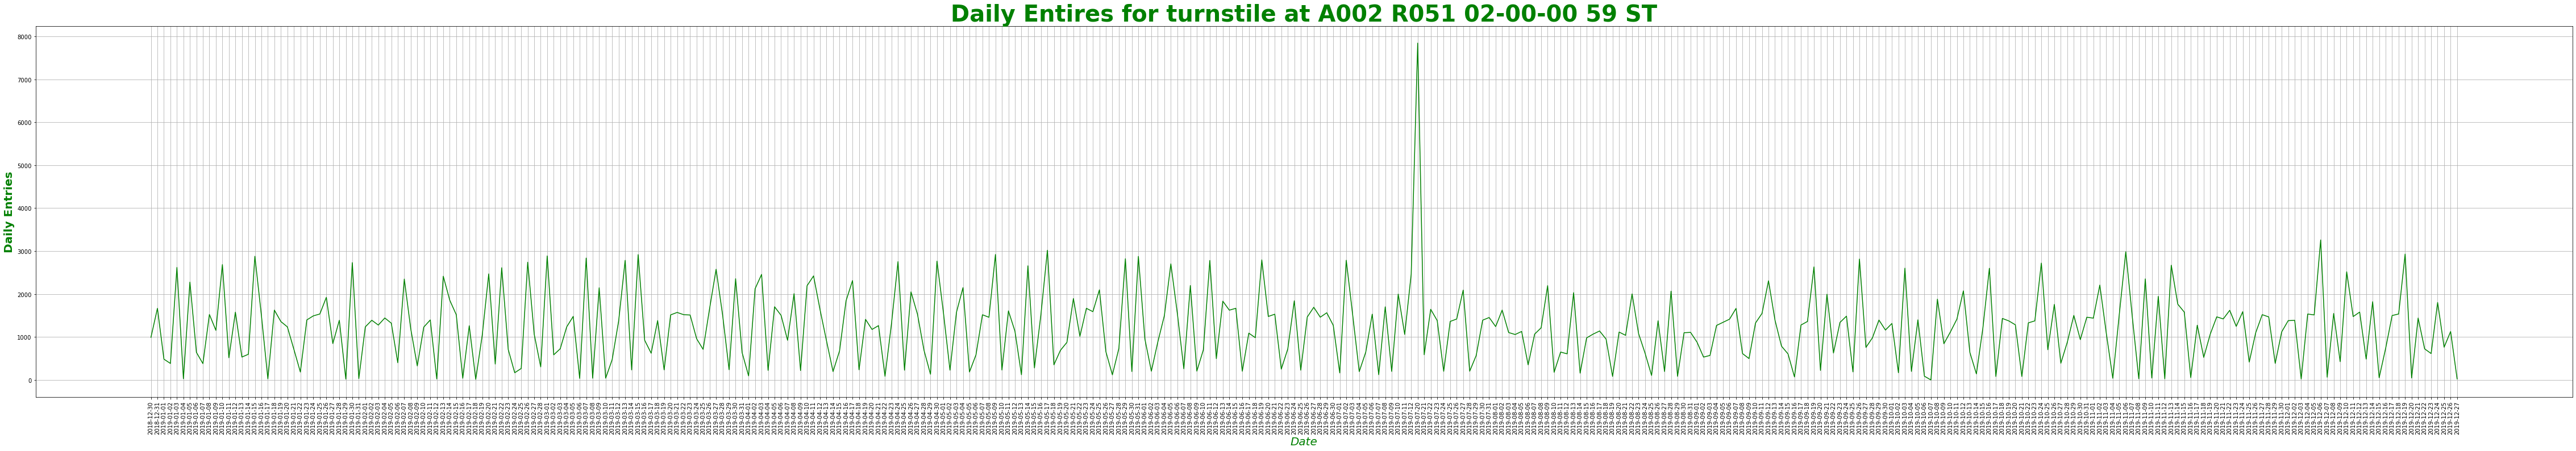

In [57]:
plt.figure(figsize=(80,12))
plt.xticks(rotation="vertical")
#note: plt.plot can't directly plot the "DATETIME_DATE" column so I convert it
#to a string first
#plt.plot(linewidth=2)
plt.plot(concat_df_daily_entries[mask]["DATETIME_DATE"].astype(str), one_turnstile_daily_entries_series,c="green")
plt.grid()
plt.title("Daily Entires for turnstile at A002 R051 02-00-00 59 ST",fontsize=40,weight="bold",color="green")
plt.xlabel("Date", color="green",fontstyle="italic",fontsize=20)
plt.ylabel("Daily Entries",weight="bold" ,color="green",fontsize=20)

plt.savefig('single_turnstile.png')
plt.show()

# Challenge 5
* So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

In [58]:
#summing entry counts across all turnstiles that belong to the same station on a daily basis
#SCP is the field the distinguishes different turnstiles in a (C/A,UNIT,STATION)
#we want to group all turnstiles together so doing this

concat_df_station_daily_entries = concat_df_daily_entries.groupby(["C/A","UNIT","STATION","DATETIME_DATE"]).size()

In [59]:
concat_df_station_daily_entries.head()

C/A   UNIT  STATION  DATETIME_DATE
A002  R051  59 ST    2018-12-30       12
                     2018-12-31       12
                     2019-01-01       12
                     2019-01-02       12
                     2019-01-03       12
dtype: int64

In [60]:
type(concat_df_station_daily_entries)

pandas.core.series.Series

In [61]:
concat_df_station_daily_entries.reset_index()

,C/A,UNIT,STATION,DATETIME_DATE,0
0,A002,R051,59 ST,2018-12-30,12
1,A002,R051,59 ST,2018-12-31,12
2,A002,R051,59 ST,2019-01-01,12
3,A002,R051,59 ST,2019-01-02,12
4,A002,R051,59 ST,2019-01-03,12
...,...,...,...,...,...
264623,TRAM2,R469,RIT-ROOSEVELT,2019-12-23,6
264624,TRAM2,R469,RIT-ROOSEVELT,2019-12-24,6
264625,TRAM2,R469,RIT-ROOSEVELT,2019-12-25,6
264626,TRAM2,R469,RIT-ROOSEVELT,2019-12-26,6


# Challenge 6
Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station.Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station.

In [62]:
concat_df_station_daily_entries = (concat_df_daily_entries.groupby(["STATION","DATETIME_DATE"])["DAILY_ENTRIES"].sum().reset_index())

In [63]:
concat_df_station_daily_entries.head(20)


,STATION,DATETIME_DATE,DAILY_ENTRIES
0,1 AV,2018-12-30,14118.0
1,1 AV,2018-12-31,12737.0
2,1 AV,2019-01-01,12257.0
3,1 AV,2019-01-02,12102.0
4,1 AV,2019-01-03,16355.0
5,1 AV,2019-01-04,27953.0
6,1 AV,2019-01-05,17323.0
7,1 AV,2019-01-06,12390.0
8,1 AV,2019-01-07,11351.0
9,1 AV,2019-01-08,28845.0


In [64]:
type(concat_df_station_daily_entries)

pandas.core.frame.DataFrame

In [65]:
concat_df_station_daily_entries.columns

Index(['STATION', 'DATETIME_DATE', 'DAILY_ENTRIES'], dtype='object')

In [66]:
concat_df_station_daily_entries

,STATION,DATETIME_DATE,DAILY_ENTRIES
0,1 AV,2018-12-30,14118.0
1,1 AV,2018-12-31,12737.0
2,1 AV,2019-01-01,12257.0
3,1 AV,2019-01-02,12102.0
4,1 AV,2019-01-03,16355.0
...,...,...,...
134306,ZEREGA AV,2019-12-23,1877.0
134307,ZEREGA AV,2019-12-24,2994.0
134308,ZEREGA AV,2019-12-25,602.0
134309,ZEREGA AV,2019-12-26,2371.0


In [67]:
mask = (concat_df_station_daily_entries["STATION"] == "1 AV") &\
(concat_df_station_daily_entries["DATETIME_DATE"] == pd.Timestamp(year=2019, month=6, day=9))
concat_df_station_daily_entries[mask].head()

,STATION,DATETIME_DATE,DAILY_ENTRIES
161,1 AV,2019-06-09,8991.0


So station "1 AV" had 8991 entries on 6/9/2019

# Challenge 7
Plot the daily time series for a station.



In [68]:
mask = (concat_df_station_daily_entries["STATION"] == "59 ST")


In [69]:

one_station_daily_entries_series = concat_df_station_daily_entries[mask]["DAILY_ENTRIES"]

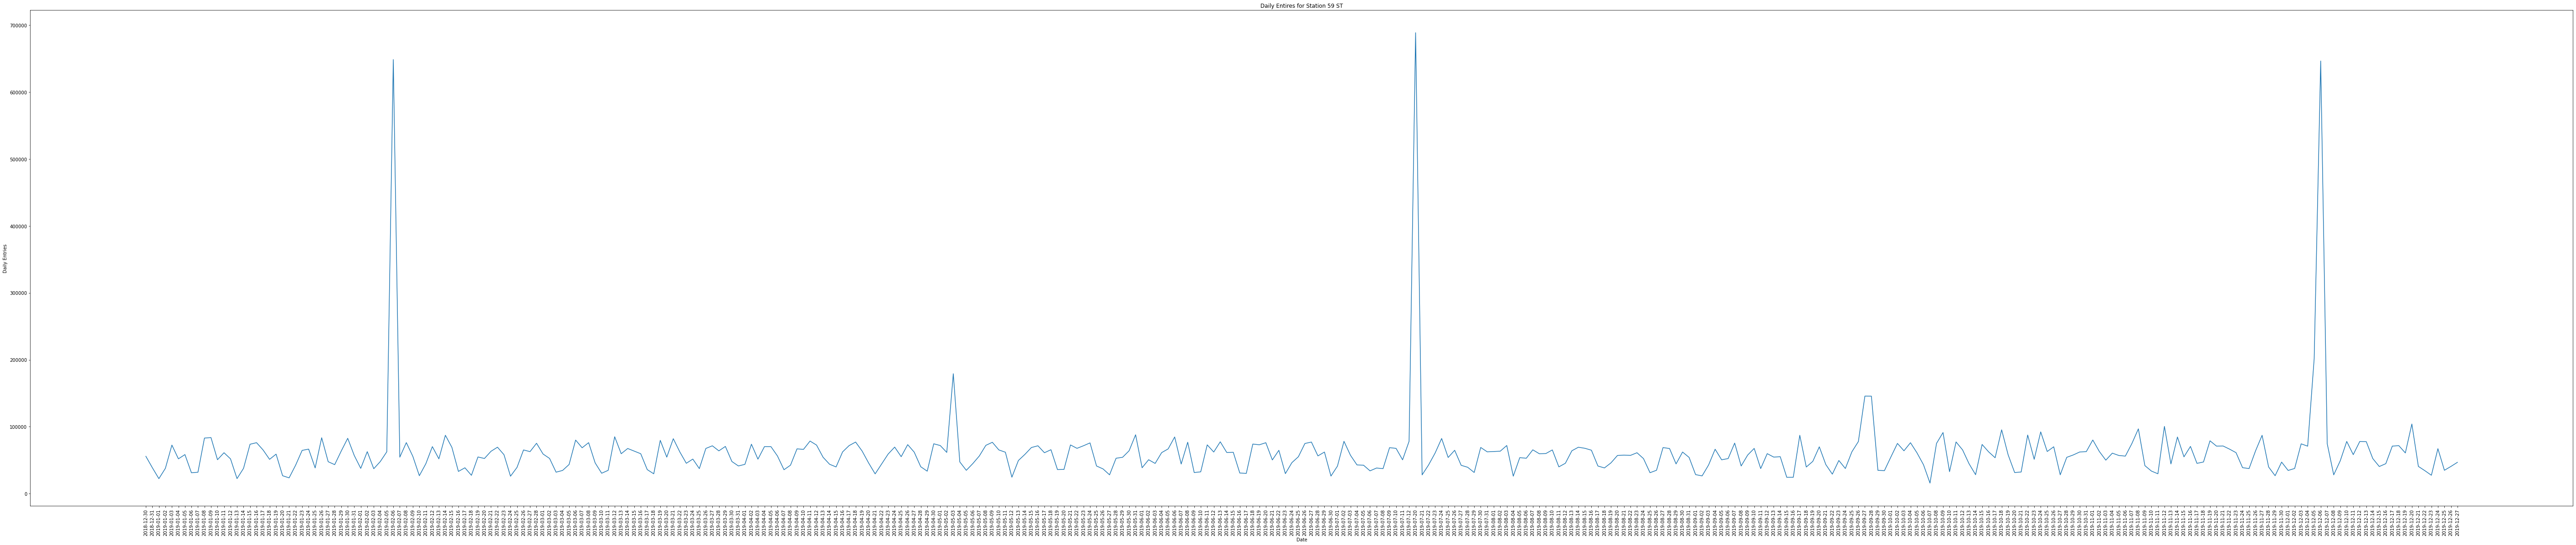

In [70]:
plt.figure(figsize=(100,20))
plt.xticks(rotation="vertical")
#note: plt.plot can't directly plot the "DATETIME_DATE" column so I convert it
#to a string first
plt.plot(concat_df_station_daily_entries[mask]["DATETIME_DATE"].astype(str),one_station_daily_entries_series)
plt.title("Daily Entires for Station 59 ST")
plt.xlabel("Date")
plt.ylabel("Daily Entries")
plt.savefig('daily_entries_station_59ST.png')
plt.show()

# Challenge 8

* Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: [pandas datetime day of week may be useful](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek)

`plt.plot(week_count_list)` for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [71]:
type(concat_df_station_daily_entries)

pandas.core.frame.DataFrame

In [72]:
concat_df_station_daily_entries

,STATION,DATETIME_DATE,DAILY_ENTRIES
0,1 AV,2018-12-30,14118.0
1,1 AV,2018-12-31,12737.0
2,1 AV,2019-01-01,12257.0
3,1 AV,2019-01-02,12102.0
4,1 AV,2019-01-03,16355.0
...,...,...,...
134306,ZEREGA AV,2019-12-23,1877.0
134307,ZEREGA AV,2019-12-24,2994.0
134308,ZEREGA AV,2019-12-25,602.0
134309,ZEREGA AV,2019-12-26,2371.0


Calculating the coresponding day of the week for each DATETIME_DATE entry in data frame concat_df_station_daily_entries

In [73]:
type(concat_df_station_daily_entries.iloc[0,1])

datetime.date

In [74]:
#
# Can't call datetime.day_name() directly on the DATETIME_DATE field as it's not the correct data type. So converted it back to a datetime object first by calling
# pandas.to_datetime() on it
#DATETIME_DATE
#DATETIME_DATE
#concat_df_station_daily_entries["DAY_OF_WEEK"] = pd.to_datetime(concat_df_station_daily_entries["DATETIME_DATE"].astype(str)).dt.day_name()
#concat_df_station_daily_entries["DATE_TIME"] = pd.to_datetime(concat_df_station_daily_entries["DATETIME_DATE"].astype(str))

def get_day_name(row):
    DAYS_OF_THE_WEEK = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    day_name_ordinal_numb = row["DATETIME_DATE"].weekday()
    return DAYS_OF_THE_WEEK[day_name_ordinal_numb]

concat_df_station_daily_entries["DAY_OF_WEEK"] = concat_df_station_daily_entries.apply(get_day_name, axis=1)

In [75]:
concat_df_station_daily_entries[concat_df_station_daily_entries.STATION=="191 ST"].head(14)

,STATION,DATETIME_DATE,DAILY_ENTRIES,DAY_OF_WEEK
13168,191 ST,2018-12-30,7248.0,Sunday
13169,191 ST,2018-12-31,3879.0,Monday
13170,191 ST,2019-01-01,6194.0,Tuesday
13171,191 ST,2019-01-02,8701.0,Wednesday
13172,191 ST,2019-01-03,6076.0,Thursday
13173,191 ST,2019-01-04,4018.0,Friday
13174,191 ST,2019-01-05,7778.0,Saturday
13175,191 ST,2019-01-06,5472.0,Sunday
13176,191 ST,2019-01-07,4672.0,Monday
13177,191 ST,2019-01-08,4475.0,Tuesday


Want to know what stations are in the data frame:

In [76]:
concat_df_station_daily_entries.STATION.unique()

array(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '155 ST', '157 ST', '161/YANKEE STAD', '163 ST-AMSTERDM', '167 ST',
       '168 ST', '169 ST', '170 ST', '174 ST', '174-175 STS', '175 ST',
       '176 ST', '18 AV', '18 ST', '181 ST', '182-183 STS', '183 ST',
       '190 ST', '191 ST', '2 AV', '20 AV', '207 ST', '21 ST',
       '21 ST-QNSBRIDGE', '215 ST', '219 ST', '225 ST', '23 ST', '231 ST',
       '233 ST', '238 ST', '25 AV', '25 ST', '28 ST', '3 AV',
       '3 AV 138 ST', '3 AV-149 ST', '30 AV', '33 ST', '33 ST-RAWSON ST',
       '34 ST-HERALD SQ', '34 ST-HUDSON YD', '34 ST-PENN STA', '36 AV',
       '36 ST', '39 AV', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST', '46 ST',
       '46 ST BLISS ST', '47-50 STS ROCK

In [77]:
type(concat_df_station_daily_entries.iloc[0,3])

str

/Users/magreen/Anaconda3-2020_07/envs/tensorflow_in_practice/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


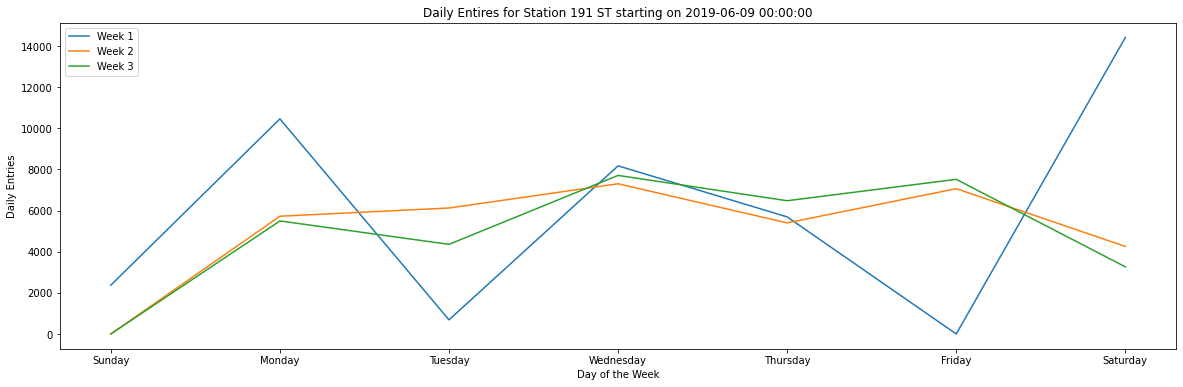

In [78]:
#plotting `DAILY_ENTRIES` values for each day of the week (from Sunday to Saturday)
#for a single station
#will plot this data for three separate weeks
STATION_NAME = "191 ST"

#NOTE START_DATE date must fall on a SUNDAY
START_DATE = pd.Timestamp(year=2019, month=6, day=9)

current_date = START_DATE

DAYS_OF_THE_WEEK = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

NUMBER_OF_WEEKS = 3

Week_Names = []

#starting plot
plt.figure(figsize=(20,6))
plt.title("Daily Entires for Station {} starting on {}".format(STATION_NAME,START_DATE))

for j in range(NUMBER_OF_WEEKS):
    
    daily_entries_for_day_of_the_week = []
   
    for i in range(len(DAYS_OF_THE_WEEK)):

        mymask = (concat_df_station_daily_entries.STATION == STATION_NAME) & (concat_df_station_daily_entries.DATETIME_DATE == current_date)
    
        #sometimes a day of the week isn't reported. assuming that means there were 0 riders that day
        if concat_df_station_daily_entries[mymask]["DAILY_ENTRIES"].empty:
            temp_daily_entries = 0
        else:
            temp_daily_entries = concat_df_station_daily_entries[mymask]["DAILY_ENTRIES"]
    
        daily_entries_for_day_of_the_week.append(temp_daily_entries)
    
        current_date = current_date + datetime.timedelta(days=1)

    #print("len of daily_entries_for_day_of_the_week is {}".format(len(daily_entries_for_day_of_the_week)))
    #plot what I have
    plt.plot(DAYS_OF_THE_WEEK,daily_entries_for_day_of_the_week)
    Week_Names.append( "Week {}".format(j+1)  )
    

plt.xlabel("Day of the Week")
plt.ylabel("Daily Entries")
plt.legend(Week_Names)
plt.savefig("net_daily_entries_for_station_191ST_WeekOf_06092019.png")
plt.show();


# Challenge 9
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [79]:
concat_df_station_daily_entries.groupby(["STATION"])["DAILY_ENTRIES"].sum().reset_index().sort_values(["DAILY_ENTRIES"], ascending=False)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,59266564.0
233,GRD CNTRL-42 ST,50607649.0
46,23 ST,40783748.0
59,34 ST-HERALD SQ,40164912.0
353,TIMES SQ-42 ST,33457863.0
...,...,...
354,TOMPKINSVILLE,215342.0
148,BEACH 98 ST,168209.0
162,BROAD CHANNEL,96039.0
141,BEACH 105 ST,91233.0


# Challenge 10
* Make a single list of these total ridership values and plot it with

    `plt.hist(total_ridership_counts)`
    
to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

_Additional Hint_:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do:

```python
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)
```

In [ ]:
concat_df_station_total_entries = concat_df_station_daily_entries.groupby(["STATION"])["DAILY_ENTRIES"].sum()\
    .reset_index()\
    .sort_values(["DAILY_ENTRIES"], ascending=False)

In [ ]:
concat_df_station_total_entries.head()

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(concat_df_station_daily_entries.groupby(["STATION"])["DAILY_ENTRIES"].sum(), 75)
plt.ylabel("Number of stations")
plt.xlabel(xlabel="Number of entries to those station");

In [ ]:
plt.figure(figsize=(10,10))
myindices = range(len(concat_df_station_total_entries))
plt.xlabel("Index of Station")
plt.ylabel("Grand Total Entries in Dataset")
plt.bar(myindices,concat_df_station_total_entries.DAILY_ENTRIES);

Checking to see if the values in the data frame make sense with respect to the graphs above.

In [ ]:
concat_df_station_total_entries.iloc[0]

In [ ]:
concat_df_station_total_entries.iloc[250]

I think they do.